In [1]:
import pandas as pd
import numpy as np
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
dataset = {'K':[[1,2],[2,3],[3,1]],'r':[[6,5],[7,7],[8,6]]}
predict = [5,7]

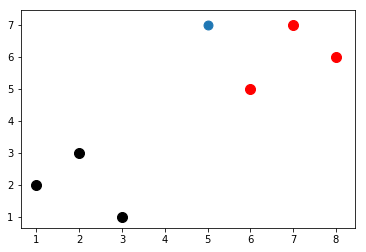

In [3]:
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]]for i in dataset]
plt.scatter(predict[0],predict[1],s=80)
plt.show()

In [25]:
def k_nearest_neighbour(data,predict,k):
    if len(data)>=k:
        print('K is set to a value less than votin group')
    Distance = []
    for group in data:
        for feature in data[group]:
            euclidean_distance = np.linalg.norm(np.array(feature)-np.array(predict))
            Distance.append([euclidean_distance,group])
    votes = [ i[1] for i in sorted(Distance)[:k]]
    #print(votes)
    vote_result = Counter(votes).most_common(1)[0][0]
    #print(vote_result)
    return vote_result

In [16]:
result = k_nearest_neighbour(dataset,predict,3)
print(result)

r


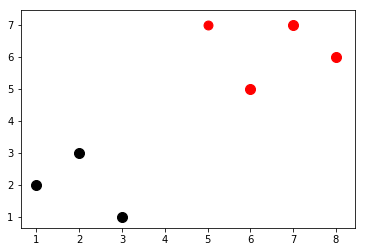

In [6]:
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]]for i in dataset]
plt.scatter(predict[0],predict[1],color=result,s=80)
plt.show()

# Applying K-Nearest Algorithm on Real Dataset

In [7]:
df = pd.read_csv('breast_cancer.csv')
df.head()

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [8]:
df.replace('?',-99999,inplace=True)
df.drop(['id number'],1,inplace=True)
full_data = df.astype('float').values.tolist()
print(full_data[:5])

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0], [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0], [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0], [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0]]


In [9]:
shuffle(full_data)
print(full_data[:5])

[[5.0, 6.0, 7.0, 8.0, 8.0, 10.0, 3.0, 10.0, 3.0, 4.0], [6.0, 3.0, 3.0, 3.0, 3.0, 2.0, 6.0, 1.0, 1.0, 2.0], [3.0, 1.0, 1.0, 4.0, 3.0, 1.0, 2.0, 2.0, 1.0, 2.0], [3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0], [5.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0]]


In [10]:
test_size = 0.2
train_set = {2:[],4:[]}
test_set = {2:[],4:[]}

train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]
print(train_data[:5])
for i in train_data:
    train_set[i[-1]].append(i[:-1])
for i in test_data:
    test_set[i[-1]].append(i[:-1])

[[5.0, 6.0, 7.0, 8.0, 8.0, 10.0, 3.0, 10.0, 3.0, 4.0], [6.0, 3.0, 3.0, 3.0, 3.0, 2.0, 6.0, 1.0, 1.0, 2.0], [3.0, 1.0, 1.0, 4.0, 3.0, 1.0, 2.0, 2.0, 1.0, 2.0], [3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0], [5.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0]]


In [11]:
print(train_set)
print(test_set)

{2: [[6.0, 3.0, 3.0, 3.0, 3.0, 2.0, 6.0, 1.0, 1.0], [3.0, 1.0, 1.0, 4.0, 3.0, 1.0, 2.0, 2.0, 1.0], [3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0], [5.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0], [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0], [1.0, 1.0, 2.0, 1.0, 3.0, -99999.0, 1.0, 1.0, 1.0], [5.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0], [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0], [6.0, 2.0, 3.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0], [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0], [4.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0], [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0], [1.0, 1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0], [3.0, 1.0, 1.0, 2.0, 3.0, 4.0, 1.0, 1.0, 1.0], [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0], [4.0, 3.0, 1.0, 1.0, 2.0, 1.0, 4.0, 8.0, 1.0], [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0], [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0], [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0], [2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 3.0, 1.0, 1.0], [5

In [30]:
correct = 0
total = 0
for groups in test_set:
    for datas in test_set[group]:
        #print(datas)
        vote = k_nearest_neighbour(train_set,datas,3)
        if vote == group:
            correct +=1
        total += 1    
print('Accuracy',correct/total)        

Accuracy 0.9782608695652174
